# Lets do some modeling!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import itertools
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor
import sklearn.datasets as datasets
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, auc, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

//anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [104]:
df = pd.read_csv('most_cleaned_data.csv', index_col=0)

In [12]:
df = pd.read_csv('bk_data.csv', index_col=0)

In [13]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET',
       'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE',
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE',
       'SALE_SEASON', 'zip_mean', 'above_mean', 'year', 'above_bk_mean'],
      dtype='object')

In [14]:
df.drop(['BOROUGH','NEIGHBORHOOD','BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'ADDRESS', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'YEAR_BUILT', 
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE',
       'zip_mean', 'above_mean'], axis=1, inplace=True)

In [15]:
print('Target Variable')
print(df.groupby(['above_bk_mean']).above_bk_mean.count())

Target Variable
above_bk_mean
0    12252
1     3178
Name: above_bk_mean, dtype: int64


In [16]:
df = pd.get_dummies(df, columns=['SALE_SEASON','ZIP_CODE', 'APARTMENT_NUMBER', 'TAX_CLASS_AT_TIME_OF_SALE', 'year'], drop_first=True)

In [17]:
df.sample(20)

,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,above_bk_mean,SALE_SEASON_2,SALE_SEASON_3,SALE_SEASON_4,ZIP_CODE_11203,ZIP_CODE_11204,ZIP_CODE_11205,ZIP_CODE_11206,...,APARTMENT_NUMBER_3,TAX_CLASS_AT_TIME_OF_SALE_2,TAX_CLASS_AT_TIME_OF_SALE_3,TAX_CLASS_AT_TIME_OF_SALE_4,"year_(1901.0, 1920.0]","year_(1921.0, 1940.0]","year_(1941.0, 1960.0]","year_(1961.0, 1980.0]","year_(1981.0, 2000.0]","year_(2001.0, 2016.0]"
7942,2013,1884,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7681,2750,720,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
24270,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
22327,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11483,1750,1848,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9592,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
8622,2030,3600,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22294,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5022,2003,2800,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [18]:
# categorical:'year', 'SALE_SEASON', 'ZIP_CODE', 'APARTMENT_NUMBER', 'TAX_CLASS_AT_TIME_OF_SALE'
# continuous: 
outcome = ['above_bk_mean']
predictors = ['year', 'SALE_SEASON', 'ZIP_CODE', 'APARTMENT_NUMBER', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET','TAX_CLASS_AT_TIME_OF_SALE']

In [19]:
# Create matrix of features
X = df.drop('above_bk_mean', axis = 1) # grabs everything else but target

# Create target variable
y = df['above_bk_mean'] # y is the column we're trying to predict

# Create a list of the features being used in the 
feature_cols = X.columns

In [20]:
X.describe()

,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,SALE_SEASON_2,SALE_SEASON_3,SALE_SEASON_4,ZIP_CODE_11203,ZIP_CODE_11204,ZIP_CODE_11205,ZIP_CODE_11206,ZIP_CODE_11207,...,APARTMENT_NUMBER_3,TAX_CLASS_AT_TIME_OF_SALE_2,TAX_CLASS_AT_TIME_OF_SALE_3,TAX_CLASS_AT_TIME_OF_SALE_4,"year_(1901.0, 1920.0]","year_(1921.0, 1940.0]","year_(1941.0, 1960.0]","year_(1961.0, 1980.0]","year_(1981.0, 2000.0]","year_(2001.0, 2016.0]"
count,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,...,15430.000000,15430.000000,15430.000000,15430.00000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000
mean,2035.040052,2648.159819,0.240700,0.279520,0.240052,0.025470,0.020933,0.024238,0.017758,0.037913,...,0.002398,0.431303,0.000065,0.06280,0.194491,0.277382,0.108360,0.048671,0.024109,0.139145
std,6139.093281,10283.134890,0.427522,0.448778,0.427129,0.157552,0.143166,0.153794,0.132074,0.190992,...,0.048911,0.495274,0.008050,0.24261,0.395821,0.447721,0.310845,0.215187,0.153392,0.346108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1800.000000,1498.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2400.000000,2625.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,270438.000000,366000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
X.columns = X.columns.str.replace(".", "")

In [82]:
X.columns

Index(['LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'SALE_SEASON_2',
       'SALE_SEASON_3', 'SALE_SEASON_4', 'ZIP_CODE_11203', 'ZIP_CODE_11204',
       'ZIP_CODE_11205', 'ZIP_CODE_11206', 'ZIP_CODE_11207', 'ZIP_CODE_11208',
       'ZIP_CODE_11209', 'ZIP_CODE_11210', 'ZIP_CODE_11211', 'ZIP_CODE_11212',
       'ZIP_CODE_11213', 'ZIP_CODE_11214', 'ZIP_CODE_11215', 'ZIP_CODE_11216',
       'ZIP_CODE_11217', 'ZIP_CODE_11218', 'ZIP_CODE_11219', 'ZIP_CODE_11220',
       'ZIP_CODE_11221', 'ZIP_CODE_11222', 'ZIP_CODE_11223', 'ZIP_CODE_11224',
       'ZIP_CODE_11225', 'ZIP_CODE_11226', 'ZIP_CODE_11227', 'ZIP_CODE_11228',
       'ZIP_CODE_11229', 'ZIP_CODE_11230', 'ZIP_CODE_11231', 'ZIP_CODE_11232',
       'ZIP_CODE_11233', 'ZIP_CODE_11234', 'ZIP_CODE_11235', 'ZIP_CODE_11236',
       'ZIP_CODE_11237', 'ZIP_CODE_11238', 'ZIP_CODE_11239', 'ZIP_CODE_11249',
       'APARTMENT_NUMBER_1', 'APARTMENT_NUMBER_3',
       'TAX_CLASS_AT_TIME_OF_SALE_2', 'TAX_CLASS_AT_TIME_OF_SALE_3',
       'TAX_CLASS_AT_TIME_O

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=38)

In [11]:
sum(y_train)/ len(y_train)

0.2026895657809462

In [12]:
sum(y_test)/ len(y_test)

0.21905379131561892

In [188]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [189]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))
dictionary

{'LAND_SQUARE_FEET': 0.0003077934871573454,
 'GROSS_SQUARE_FEET': 0.00028506862692341686,
 'SALE_SEASON_2': -0.06019461699732654,
 'SALE_SEASON_3': 0.11931581522129572,
 'SALE_SEASON_4': 0.09637361386255758,
 'ZIP_CODE_11203': -3.0478027192314103,
 'ZIP_CODE_11204': -1.5121479686194719,
 'ZIP_CODE_11205': -0.7220361000849764,
 'ZIP_CODE_11206': -1.199926880610631,
 'ZIP_CODE_11207': -2.83794911653432,
 'ZIP_CODE_11208': -3.4443071433523444,
 'ZIP_CODE_11209': -1.667792731057869,
 'ZIP_CODE_11210': -2.0157240976839756,
 'ZIP_CODE_11211': 0.888333659241961,
 'ZIP_CODE_11212': -2.8340491870418196,
 'ZIP_CODE_11213': -1.6778940212896045,
 'ZIP_CODE_11214': -1.5920791783021615,
 'ZIP_CODE_11215': 0.5960101152744871,
 'ZIP_CODE_11216': -0.6646994975437052,
 'ZIP_CODE_11217': 0.9392369285822461,
 'ZIP_CODE_11218': -1.5145685355035428,
 'ZIP_CODE_11219': -1.0888308227952113,
 'ZIP_CODE_11220': -1.3018631092025703,
 'ZIP_CODE_11221': -1.9321532185381676,
 'ZIP_CODE_11222': 0.601915096158159,
 '

In [190]:
y_pred = logreg.predict(X_test)

The simplest metric we can use to evaluate our model is accuracy.

**Classification Accuracy:** Overall, how often is the classifier correct?

In [191]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.8639014906027219


In [192]:
#check null accuracy - how often would it be right if it always guessed yes
max(y_test.mean(), 1 - y_test.mean())

0.780946208684381

### Ok, so that's not great

In [193]:
print(metrics.confusion_matrix(y_test, y_pred))

[[2353   57]
 [ 363  313]]


In [194]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
classes = ['Below Average', 'Above Average']

In [138]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [136]:
def print_eval_metrics(y_test, y_pred, y):
    # check null accuracy
    print(f'Null Accuracy: {max(y_test.mean(), 1 - y_test.mean())}')
    # Calculate Accuracy 
    acc = metrics.accuracy_score(y_test,y_pred) * 100
    print("Accuracy is :{0}".format(acc))
    # Calculate F1-Score 
    f1 = f1_score(y_test,y_pred)
    print("F1-Score is :{0}".format(f1))
    # Calculate Precision
    pre = metrics.precision_score(y_test, y_pred)
    print("Precision Score is :{0}".format(pre))
    # Calculate Recall
    recall = metrics.recall_score(y_test,y_pred)
    print("Recall Score is :{0}".format(recall))
    # Check the AUC for predictions
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("\nAUC is :{0}".format(round(roc_auc,2)))
    # Create and print a confusion matrix 
    print('\nConfusion Matrix')
    print('----------------')
#     print(confusion_matrix(y_test, y_pred), y)
    cm = confusion_matrix(y_test, y_pred)
    classes = ["Below Average", "Above Average"]
    plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

Confusion Matrix, without normalization
[[2353   57]
 [ 363  313]]


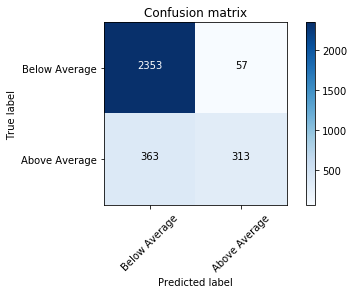

In [196]:
# positive = above average
# negative = below average
plot_confusion_matrix(cm, classes)

## Precision
When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [197]:
# check the precision
print(metrics.precision_score(y_test, y_pred))

0.845945945945946


## Recall (Sensitivity)

What proportion of actual positives was identified correctly?

In [198]:
print(metrics.recall_score(y_test, y_pred))

0.4630177514792899


## F1 score 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

In [199]:
2*(metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred))/(metrics.precision_score(y_test, y_pred)+metrics.recall_score(y_test, y_pred))

0.5984703632887189

In [200]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred))

0.7196831495985662


In [201]:
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

0.786767280206339

# I need to 'SMOTE' my classes (too uneven)

ONLY SMOTE THE TRAINING

In [84]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm_train, y_sm_train = smote.fit_resample(X_train, y_train)
# clf_smote = LinearSVC().fit(X_sm, y_sm)
# plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [64]:
# X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=1)

In [105]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [106]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.8639014906027219


In [107]:
#check null accuracy - how often would it be right if it always guessed yes
max(y_test.mean(), 1 - y_test.mean())

0.780946208684381

Confusion Matrix, without normalization
[[2025  385]
 [ 294  382]]


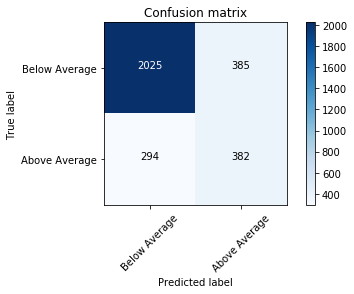

In [206]:
# print(metrics.confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
classes = ['Below Average', 'Above Average']
plot_confusion_matrix(cm, classes)

In [207]:
print('F1 Score:')
2*(metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred))/(metrics.precision_score(y_test, y_pred)+metrics.recall_score(y_test, y_pred))

F1 Score:


0.5294525294525295

## Ok, KNN now?

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=38)
scaler = StandardScaler()  
scaler.fit(X_train)

Xs_train = scaler.transform(X_train)  
Xs_test = scaler.transform(X_test)

In [125]:
knn = KNeighborsClassifier(n_neighbors=3)

In [126]:
knn.fit(Xs_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [127]:
y_pred = knn.predict(Xs_test)

In [128]:
f1_score(y_test, y_pred, average='weighted')

0.8343301625113233

In [130]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [131]:
# look at accuracy:
print(f'Classification Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
# check null accuracy:
print(f'Null Accuracy: {max(y_test.mean(), 1 - y_test.mean())}')
# check precision
print(f'Precision: {metrics.precision_score(y_test, y_pred)}')
# check recall
print(f'Recall: {metrics.recall_score(y_test, y_pred)}')
# check specificity
print(f'Specificity: {(TN/float(TN+FP))}')
# check false positive rate
print(f'False Positive Rate: {FP/float(TN+FP)}')
# check F1
print(f'F1 Score: {(metrics.f1_score(y_test, y_pred))}')

Classification Accuracy: 0.8447382063245205
Null Accuracy: 0.7833074131674442
Precision: 0.7011884550084889
Recall: 0.49401913875598086
Specificity: 0.9417604235605559
False Positive Rate: 0.05823957643944408
F1 Score: 0.5796491228070175


In [123]:
k_range = list(range(1, 20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xs_train, y_train)
    y_predict = knn.predict(Xs_test)
    score = f1_score(y_test, y_predict, average='weighted')
    k_scores.append(score)
print(k_scores)

[0.8238914071468518, 0.8127304551420372, 0.8343301625113233, 0.8178304722925145, 0.831459944284962, 0.8149275612957962, 0.8298410790403437, 0.8151160544395908, 0.8247688427013073, 0.8102887017428265, 0.8203933238333436, 0.8082798558591059, 0.8131763888129191, 0.8045957760762481, 0.8144168867368048, 0.8030656895173518, 0.8089388349904804, 0.8039237157566066, 0.809502265448164]


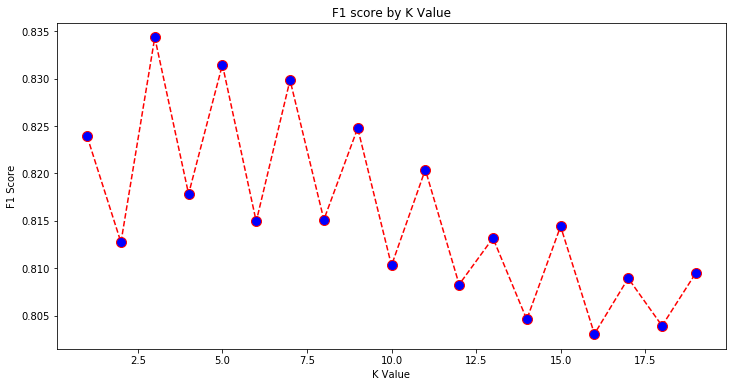

In [124]:
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

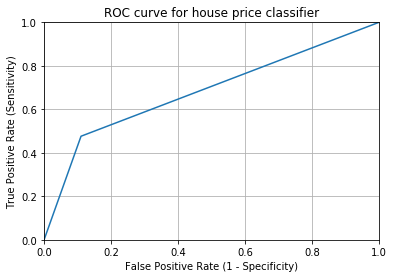

In [218]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for house price classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# Decision Tree Time!

In [224]:
ctree=DecisionTreeClassifier(max_depth = 3)
ctree.fit(X_sm_train, y_sm_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

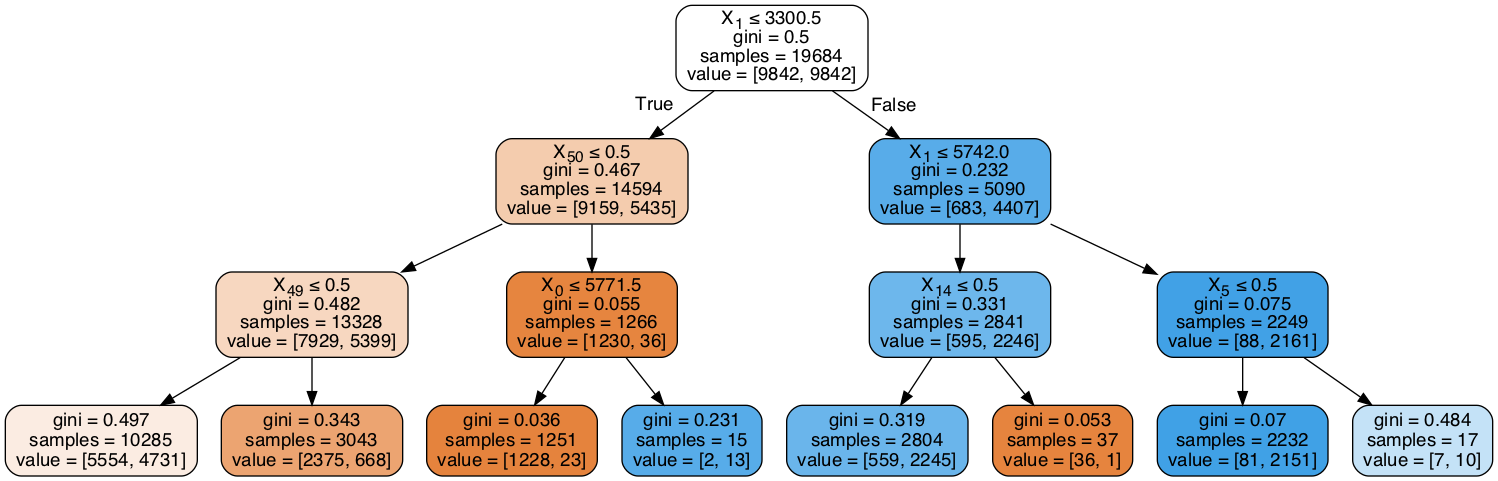

In [249]:
dot_data = StringIO()
export_graphviz(ctree, out_file=dot_data,  
                rounded=True, filled=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [226]:
classPred = ctree.predict(X_test)

In [235]:
print(f'Testing Accuracy for Decision Tree Classifier: {round((accuracy_score(y_test, classPred))*100,2)}%')

Testing Accuracy for Decision Tree Classifier: 81.98%


[0.829553127868361, 0.7916210162998328, 0.8069891516435526, 0.8029657938985639, 0.8017358556384725, 0.8036804565086989, 0.801930492987965, 0.8084083916854599, 0.8038693788856767]


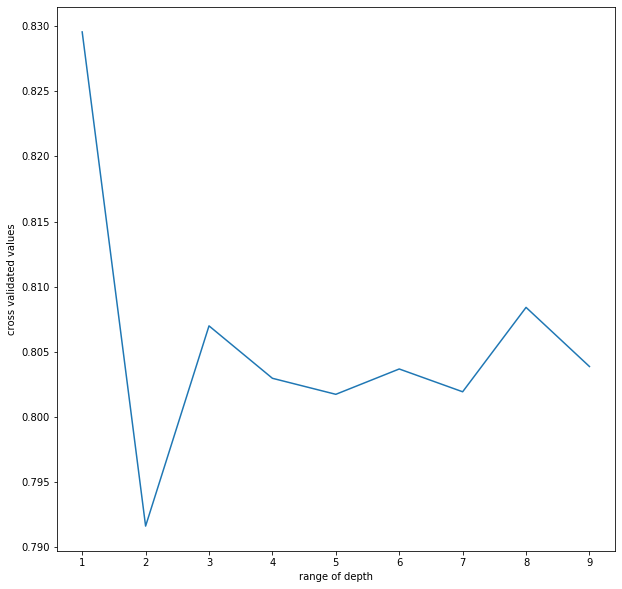

In [223]:
score = cross_val_score(ctree, X, y, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, X, y, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

Plot the validation curve?

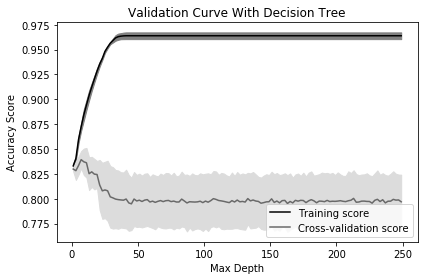

In [228]:
# Create range of values for parameter
param_range = np.arange(1, 250, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), 
                                             X, 
                                             y, 
                                             param_name="max_depth", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

## Hmmm

# Ensemble Methods

To construct a Random Forest estimator, what we need is:
Bootstrap the entire dataset
Build a tree using only a random subset of the features at each node from bootstrapped dataset
Repeat step 1 and 2 many, many, many times, and aggregate all the trees
Output prediction through each tree
- For classification, take the majority predicted value


**use gridsearch to tune hyperparamaters!**

In [229]:
ctree.feature_importances_

array([0.00826916, 0.74050087, 0.        , 0.        , 0.        ,
       0.00184408, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01694434,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.1052761 ,
       0.12716545, 0.        , 0.        , 0.        ])

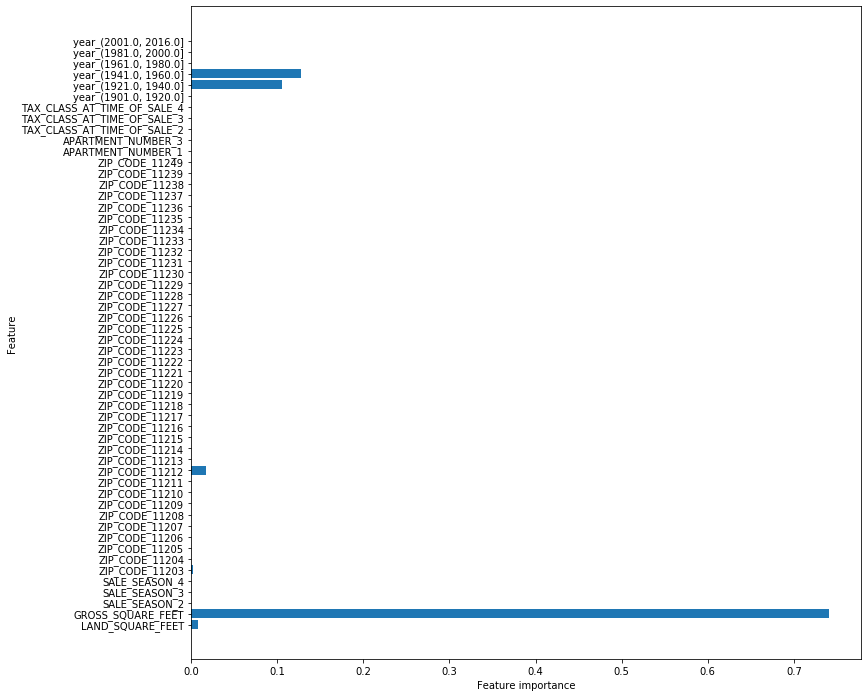

In [230]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.figure(figsize=(12,12))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(ctree)

In [232]:
print(confusion_matrix(y_test, classPred))
print(classification_report(y_test, classPred))

[[2241  169]
 [ 387  289]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2410
           1       0.63      0.43      0.51       676

    accuracy                           0.82      3086
   macro avg       0.74      0.68      0.70      3086
weighted avg       0.80      0.82      0.81      3086



#### Bagged Trees come next

In [236]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=3), n_estimators=20)

In [237]:
bagged_tree.fit(X_sm_train, y_sm_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [238]:
bagged_tree.score(X_sm_train, y_sm_train)

0.6900528347896769

In [239]:
bagged_tree.score(X_test, y_test)

0.8185353208036293

#### Random Forest - go vote!

In [263]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
# , max_depth= 5, 
forest.fit(X_sm_train, y_sm_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [264]:
forest.score(X_sm_train, y_sm_train)

0.9587482219061166

In [265]:
forest.score(X_test, y_test)

0.8344134802333117

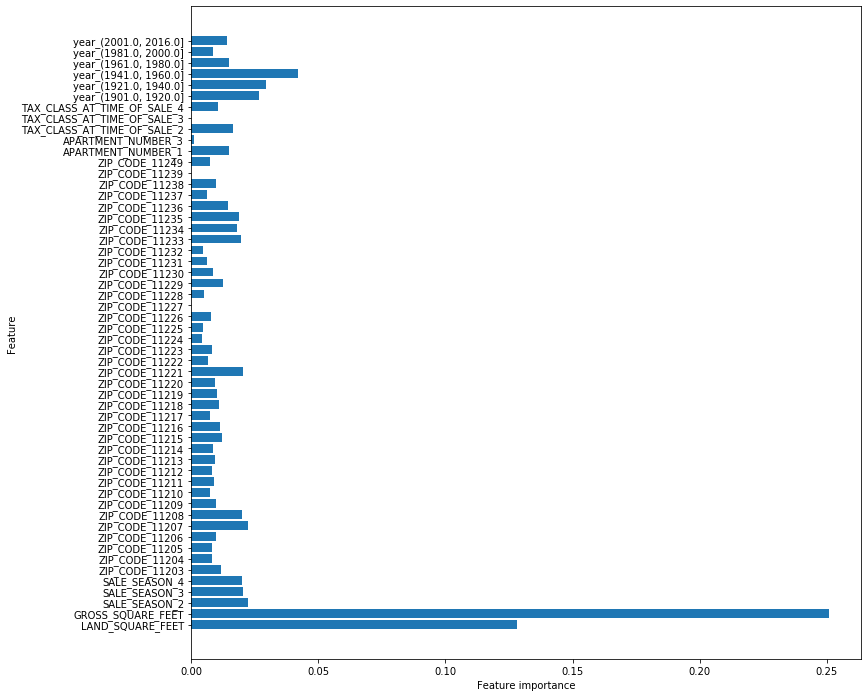

In [255]:
plot_feature_importances(forest)

*So, it's a bit odd that my testing result is higher than my training result....*


I should do some gridsearch to tune my hyperparameters! 

In [256]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(forest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [257]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 15, 26, 36, 47, 57, 68, 78, 89, 99, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [260]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_sm_train, y_sm_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
//anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None,
 

In [261]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 99,
 'bootstrap': True}

In [269]:
hyp_forest = RandomForestClassifier(n_estimators= 400, min_samples_split= 5, min_samples_leaf= 1, 
                                    max_features= 'sqrt', max_depth= 99, bootstrap= True, random_state=42)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [273]:
hyp_forest.fit(X_sm_train, y_sm_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=99, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [274]:
hyp_forest.score(X_sm_train, y_sm_train)

0.9500101605364764

In [282]:
hyp_forest.score(X, y)

0.9110174983797796

In [275]:
hyp_forest.score(X_test, y_test)

0.837653920933247

In [284]:
print(f'Score improved by {round(100*((hyp_forest.score(X_test, y_test)-forest.score(X_test, y_test))/forest.score(X_test, y_test)),2)}%')

Score improved by 0.39%


In [281]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2,5,10],
    'n_estimators': [200, 400, 600, 800]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [283]:
grid_search.fit(X_sm_train, y_sm_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  9.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [285]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [287]:
best_forest = RandomForestClassifier(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 1, 
                                    max_features= 3, max_depth= 80, bootstrap= True, random_state=42)

In [288]:
best_forest.fit(X_sm_train, y_sm_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Checking for the accuracy of the model below:

In [289]:
best_forest.score(X_sm_train, y_sm_train)

0.9587482219061166

In [290]:
best_forest.score(X_test, y_test)

0.837653920933247

In [291]:
print(f'Score improved over base by {round(100*((best_forest.score(X_test, y_test)-forest.score(X_test, y_test))/forest.score(X_test, y_test)),2)}%')
print(f'Score improved over last by {round(100*((best_forest.score(X_test, y_test)-hyp_forest.score(X_test, y_test))/hyp_forest.score(X_test, y_test)),2)}%')

Score improved over base by 0.39%
Score improved over last by 0.0%


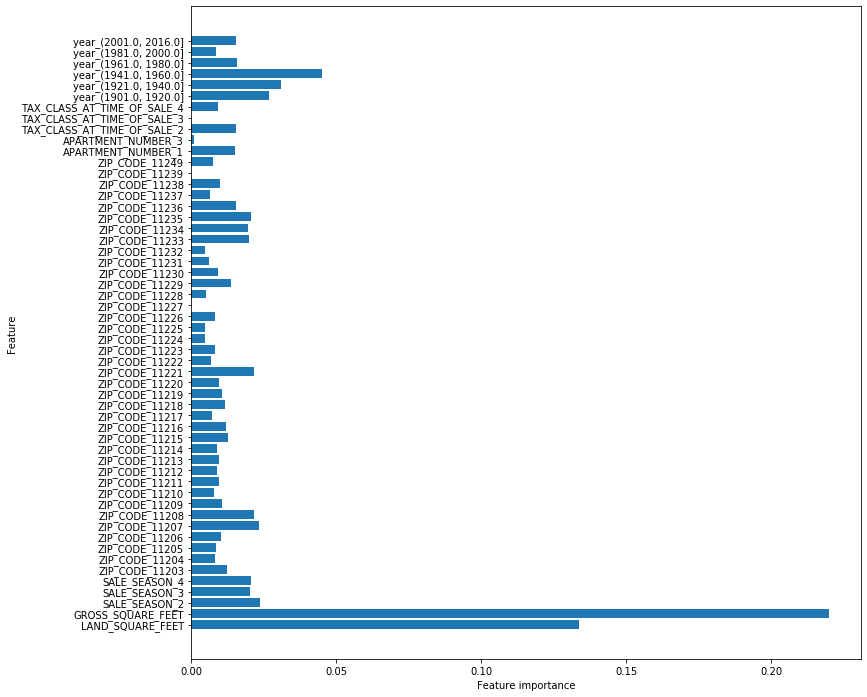

In [292]:
plot_feature_importances(hyp_forest)

In [293]:
pred = hyp_forest.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[2093  317]
 [ 184  492]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2410
           1       0.61      0.73      0.66       676

    accuracy                           0.84      3086
   macro avg       0.76      0.80      0.78      3086
weighted avg       0.85      0.84      0.84      3086



It looks like I'm getting a lot of false positives?

In [294]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 83.77%


In [300]:
# looking at what an individual tree is doing
rf_tree_1 = hyp_forest.estimators_[10]

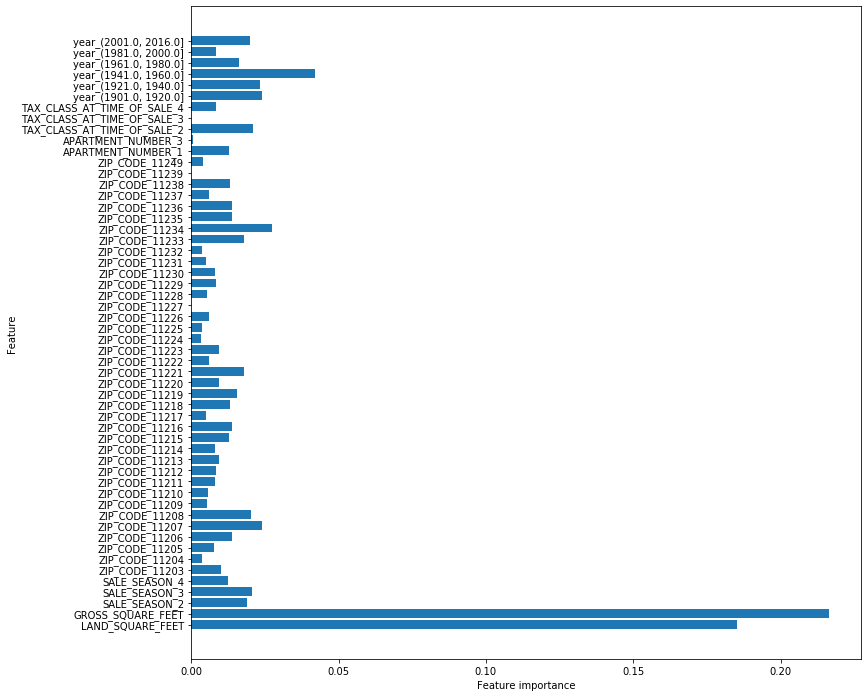

In [301]:
plot_feature_importances(rf_tree_1)

In [308]:
print(f'ROC AUC score:{roc_auc_score(y_test, pred)}')

ROC AUC score:0.7981376905890152


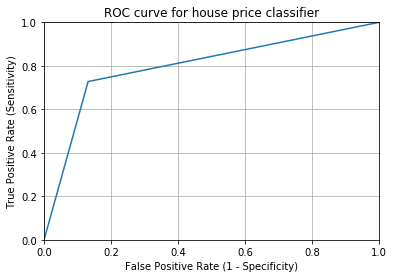

In [309]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for house price classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Using the stuff from the learn lab on ROC:

AUC: 0.9005686979793268


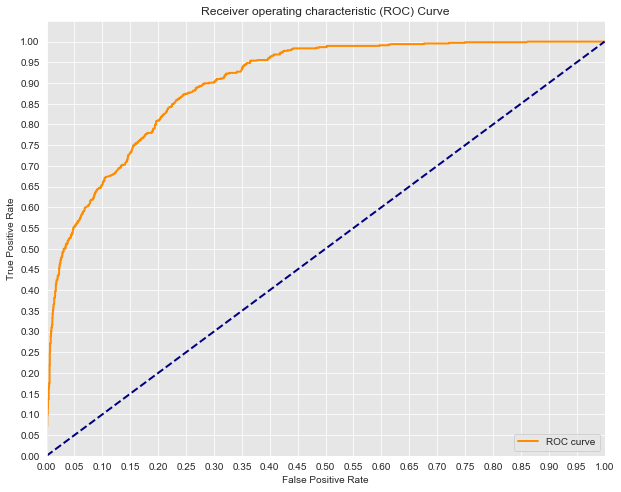

In [312]:
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix, without normalization
[[2093  317]
 [ 184  492]]


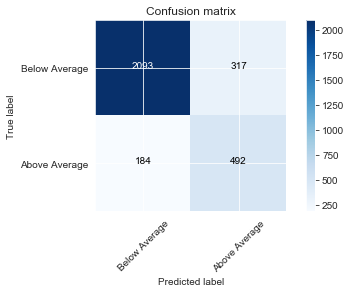

In [316]:
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [ ]:
plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

# SVM

In [135]:
svclassifier = SVC(kernel='rbf', gamma='scale')  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)

In [32]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[2075  335]
 [ 322  354]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2410
           1       0.51      0.52      0.52       676

    accuracy                           0.79      3086
   macro avg       0.69      0.69      0.69      3086
weighted avg       0.79      0.79      0.79      3086

The accuracy score is 0.787103046014258


Null Accuracy: 0.7838626053143227
Accuracy is :82.24238496435515
F1-Score is :0.3429256594724221
Precision Score is :0.8562874251497006
Recall Score is :0.2143928035982009

AUC is :0.6

Confusion Matrix
----------------
Confusion Matrix, without normalization
[[2395   24]
 [ 524  143]]


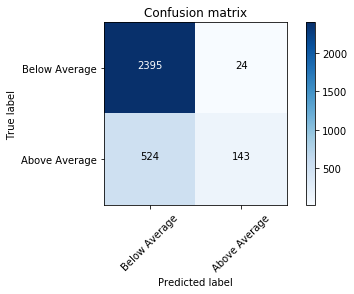

In [139]:
print_eval_metrics(y_test, y_pred, y)

## AAHHHH, so here ('poly') I'm getting more type II errors, where in RF I was getting more type I errors - so I could pick the model by the errors I'd prefer...

In [37]:
gsc = GridSearchCV(
        estimator=SVC(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [38]:
grid_result = gsc.fit(X_sm_train, y_sm_train)

//anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [40]:
best_params = grid_result.best_params_
best_params

{'C': 1000, 'gamma': 0.0001}

In [41]:
best_svclassifier = SVC(kernel='rbf', gamma=0.0001, C = 1000)  
best_svclassifier.fit(X_sm_train, y_sm_train) 
y_pred = best_svclassifier.predict(X_test)

In [42]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[1832  578]
 [ 210  466]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      2410
           1       0.45      0.69      0.54       676

    accuracy                           0.74      3086
   macro avg       0.67      0.72      0.68      3086
weighted avg       0.80      0.74      0.76      3086

The accuracy score is 0.744653272845107


In [ ]:
best_svclassifier = SVC(kernel='poly', gamma=0.0001, C = 1000)  
best_svclassifier.fit(X_sm_train, y_sm_train) 
y_pred = best_svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

## Boosting

In [15]:
adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier()

In [140]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=50, random_state=None)

In [141]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [142]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [143]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_sm_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_sm_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics


ValueError: Found input variables with inconsistent numbers of samples: [19684, 12344]

In [144]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[2374,   45],
       [ 406,  261]])

Null Accuracy: 0.7838626053143227
Accuracy is :85.38561244329229
F1-Score is :0.5364850976361768
Precision Score is :0.8529411764705882
Recall Score is :0.391304347826087

AUC is :0.69

Confusion Matrix
----------------
Confusion Matrix, without normalization
[[2374   45]
 [ 406  261]]


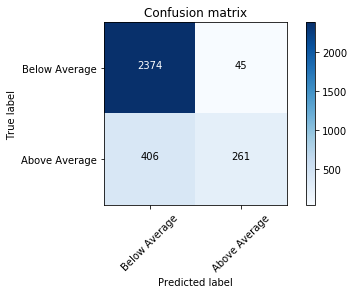

In [146]:
print_eval_metrics(y_test, adaboost_test_preds, y)

In [145]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[2359,   60],
       [ 353,  314]])

Null Accuracy: 0.7838626053143227
Accuracy is :86.61697990926766
F1-Score is :0.6032660902977905
Precision Score is :0.839572192513369
Recall Score is :0.4707646176911544

AUC is :0.72

Confusion Matrix
----------------
Confusion Matrix, without normalization
[[2359   60]
 [ 353  314]]


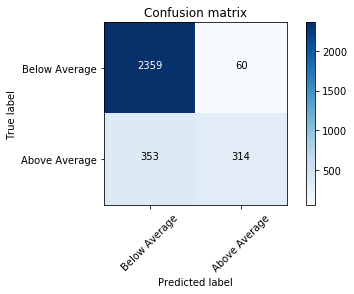

In [147]:
print_eval_metrics(y_test, gbt_clf_test_preds, y)

In [23]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2410
           1       0.55      0.71      0.62       676

    accuracy                           0.81      3086
   macro avg       0.73      0.77      0.75      3086
weighted avg       0.83      0.81      0.82      3086



In [24]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2410
           1       0.57      0.67      0.62       676

    accuracy                           0.82      3086
   macro avg       0.74      0.77      0.75      3086
weighted avg       0.83      0.82      0.82      3086



In [30]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, X, y, cv=5).mean())

Mean Adaboost Cross-Val Score (k=5):
0.8197567810577711


In [32]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X, y, cv=5).mean())

Mean GBT Cross-Val Score (k=5):
0.8283768369871183


In [52]:
# trying with different parameters
adaboost_clf = AdaBoostClassifier(learning_rate=0.5)
adaboost_clf.fit(X_sm_train, y_sm_train)
print("Training Metrics")
display_acc_and_f1_score(y_sm_train, adaboost_train_preds, model_name='AdaBoost_new_learn_rate')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost_new_learn_rate')
print("")

Training Metrics
Model: AdaBoost_new_learn_rate
Accuracy: 0.8722820564925828
F1-Score: 0.8746384761144909

Testing Metrics
Model: AdaBoost_new_learn_rate
Accuracy: 0.8097861309138042
F1-Score: 0.619078520441272



In [88]:
clf = xgb.XGBClassifier()
clf.fit(X_sm_train, y_sm_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [91]:
labels = y
labels_removed_df = X

In [92]:
training_preds = clf.predict(X_sm_train)

In [112]:
test_preds = clf.predict(X_test)

In [103]:
# X_test = pd.DataFrame(X_test)
X_test.columns

Index(['LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'SALE_SEASON_2',
       'SALE_SEASON_3', 'SALE_SEASON_4', 'ZIP_CODE_11203', 'ZIP_CODE_11204',
       'ZIP_CODE_11205', 'ZIP_CODE_11206', 'ZIP_CODE_11207', 'ZIP_CODE_11208',
       'ZIP_CODE_11209', 'ZIP_CODE_11210', 'ZIP_CODE_11211', 'ZIP_CODE_11212',
       'ZIP_CODE_11213', 'ZIP_CODE_11214', 'ZIP_CODE_11215', 'ZIP_CODE_11216',
       'ZIP_CODE_11217', 'ZIP_CODE_11218', 'ZIP_CODE_11219', 'ZIP_CODE_11220',
       'ZIP_CODE_11221', 'ZIP_CODE_11222', 'ZIP_CODE_11223', 'ZIP_CODE_11224',
       'ZIP_CODE_11225', 'ZIP_CODE_11226', 'ZIP_CODE_11227', 'ZIP_CODE_11228',
       'ZIP_CODE_11229', 'ZIP_CODE_11230', 'ZIP_CODE_11231', 'ZIP_CODE_11232',
       'ZIP_CODE_11233', 'ZIP_CODE_11234', 'ZIP_CODE_11235', 'ZIP_CODE_11236',
       'ZIP_CODE_11237', 'ZIP_CODE_11238', 'ZIP_CODE_11239', 'ZIP_CODE_11249',
       'APARTMENT_NUMBER_1', 'APARTMENT_NUMBER_3',
       'TAX_CLASS_AT_TIME_OF_SALE_2', 'TAX_CLASS_AT_TIME_OF_SALE_3',
       'TAX_CLASS_AT_TIME_O

In [109]:
from sklearn import preprocessing 
for f in X_train.columns: 
    if X_train[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(X_train[f].values)) 
        X_train[f] = lbl.transform(list(X_train[f].values))

for f in X_test.columns: 
    if X_test[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(X_test[f].values)) 
        X_test[f] = lbl.transform(list(X_test[f].values))

X_train.fillna((-999), inplace=True) 
X_test.fillna((-999), inplace=True)

X_train=np.array(X_train) 
X_test=np.array(X_test) 
X_train = X_train.astype(float) 
X_test = X_test.astype(float)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [110]:
test_preds = clf.predict(X_test)

In [94]:
training_accuracy = accuracy_score(y_sm_train, training_preds)

In [95]:
training_accuracy

0.8468807153017679

In [113]:
test_accuracy = accuracy_score(y_test, test_preds)
test_accuracy

0.8227478937135451

In [114]:
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [5, 30, 100, 250],
}

In [115]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X, y)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_sm_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_sm_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 10
n_estimators: 100
subsample: 0.7


ValueError: feature_names mismatch: ['LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'SALE_SEASON_2', 'SALE_SEASON_3', 'SALE_SEASON_4', 'ZIP_CODE_11203', 'ZIP_CODE_11204', 'ZIP_CODE_11205', 'ZIP_CODE_11206', 'ZIP_CODE_11207', 'ZIP_CODE_11208', 'ZIP_CODE_11209', 'ZIP_CODE_11210', 'ZIP_CODE_11211', 'ZIP_CODE_11212', 'ZIP_CODE_11213', 'ZIP_CODE_11214', 'ZIP_CODE_11215', 'ZIP_CODE_11216', 'ZIP_CODE_11217', 'ZIP_CODE_11218', 'ZIP_CODE_11219', 'ZIP_CODE_11220', 'ZIP_CODE_11221', 'ZIP_CODE_11222', 'ZIP_CODE_11223', 'ZIP_CODE_11224', 'ZIP_CODE_11225', 'ZIP_CODE_11226', 'ZIP_CODE_11227', 'ZIP_CODE_11228', 'ZIP_CODE_11229', 'ZIP_CODE_11230', 'ZIP_CODE_11231', 'ZIP_CODE_11232', 'ZIP_CODE_11233', 'ZIP_CODE_11234', 'ZIP_CODE_11235', 'ZIP_CODE_11236', 'ZIP_CODE_11237', 'ZIP_CODE_11238', 'ZIP_CODE_11239', 'ZIP_CODE_11249', 'APARTMENT_NUMBER_1', 'APARTMENT_NUMBER_3', 'TAX_CLASS_AT_TIME_OF_SALE_2', 'TAX_CLASS_AT_TIME_OF_SALE_3', 'TAX_CLASS_AT_TIME_OF_SALE_4', 'year_19010_19200', 'year_19210_19400', 'year_19410_19600', 'year_19610_19800', 'year_19810_20000', 'year_20010_20160'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53']
expected LAND_SQUARE_FEET, ZIP_CODE_11209, ZIP_CODE_11237, TAX_CLASS_AT_TIME_OF_SALE_3, year_19210_19400, year_19010_19200, year_19810_20000, ZIP_CODE_11226, SALE_SEASON_3, ZIP_CODE_11216, ZIP_CODE_11223, ZIP_CODE_11236, SALE_SEASON_2, ZIP_CODE_11222, ZIP_CODE_11213, APARTMENT_NUMBER_3, ZIP_CODE_11235, ZIP_CODE_11210, SALE_SEASON_4, ZIP_CODE_11229, ZIP_CODE_11212, ZIP_CODE_11214, ZIP_CODE_11215, ZIP_CODE_11227, year_19610_19800, ZIP_CODE_11232, TAX_CLASS_AT_TIME_OF_SALE_2, ZIP_CODE_11203, ZIP_CODE_11220, ZIP_CODE_11231, ZIP_CODE_11207, ZIP_CODE_11219, ZIP_CODE_11225, ZIP_CODE_11230, ZIP_CODE_11224, ZIP_CODE_11234, year_20010_20160, ZIP_CODE_11238, ZIP_CODE_11204, ZIP_CODE_11233, ZIP_CODE_11208, year_19410_19600, ZIP_CODE_11205, TAX_CLASS_AT_TIME_OF_SALE_4, GROSS_SQUARE_FEET, ZIP_CODE_11206, ZIP_CODE_11249, ZIP_CODE_11239, ZIP_CODE_11228, ZIP_CODE_11218, ZIP_CODE_11217, ZIP_CODE_11211, APARTMENT_NUMBER_1, ZIP_CODE_11221 in input data
training data did not have the following fields: f40, f2, f48, f25, f46, f9, f52, f30, f1, f51, f32, f31, f28, f53, f38, f12, f16, f35, f4, f45, f21, f19, f3, f22, f27, f23, f14, f50, f44, f36, f15, f29, f34, f8, f13, f26, f39, f47, f11, f6, f37, f20, f43, f49, f17, f18, f7, f24, f42, f5, f41, f10, f0, f33